# LabelEncoder

In [3]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

In [7]:
le = LabelEncoder()
le.fit([1,7,7,6])

LabelEncoder()

In [8]:
le.classes_

array([1, 6, 7])

In [10]:
le.transform([1,1,7,6])

array([0, 0, 2, 1], dtype=int64)

In [11]:
le.inverse_transform([0,0,1,2])

array([1, 1, 6, 7])

### Usando texto

In [16]:
le = LabelEncoder()
le.fit(['Tokio', 'Paris', 'Berlin', 'Paris', 'Amsterdam'])

LabelEncoder()

In [18]:
list(le.classes_)

['Amsterdam', 'Berlin', 'Paris', 'Tokio']

In [20]:
le.transform(['Tokio', 'Tokio', 'Amsterdam', 'Paris', 'Berlin'])

array([3, 3, 0, 2, 1], dtype=int64)

### Ejemplo 

In [33]:
df = pd.read_excel('./../../dataset/xlsx/spreadsheet1.xlsx', sheet_name='LabelEncoder')
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [31]:
le.fit([df['Country']])

ValueError: bad input shape (1, 10)

In [34]:
raw_data = {'patient': [1, 1, 1, 2, 2],
        'obs': [1, 2, 3, 1, 2],
        'treatment': [0, 1, 0, 1, 0],
        'score': ['strong', 'weak', 'normal', 'weak', 'strong']}
df = pd.DataFrame(raw_data, columns = ['patient', 'obs', 'treatment', 'score'])

In [36]:
le.fit(df['score'])

LabelEncoder()

In [37]:
list(le.classes_)

['normal', 'strong', 'weak']

In [41]:
df['score'] = le.transform(df['score'])

In [44]:
df

,patient,obs,treatment,score
0,1,1,0,1
1,1,2,1,2
2,1,3,0,0
3,2,1,1,2
4,2,2,0,1


### OneHotEncoder

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
encoder = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
encoder.fit(X)

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=True)

In [47]:
encoder.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [48]:
encoder.transform([['Female', 1], ['Male', 4]]).toarray()

array([[1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [50]:
encoder.inverse_transform([[0,1,1,0,0],[0,0,0,1,0]])

array([['Male', 1],
       [None, 2]], dtype=object)

In [51]:
encoder.get_feature_names()

array(['x0_Female', 'x0_Male', 'x1_1', 'x1_2', 'x1_3'], dtype=object)

In [75]:
le = LabelEncoder()
integer_encoded = le.fit_transform(['Barcelona', 'Paris', 'Monaco', 'Barcelona'])
integer_encoded

array([0, 2, 1, 0], dtype=int64)

In [76]:
encoder = OneHotEncoder(sparse=False)

In [77]:
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
integer_encoded

array([[0],
       [2],
       [1],
       [0]], dtype=int64)

In [78]:
encoder = encoder.fit_transform(integer_encoded)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [79]:
encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

#### La lista de etiquetas es: ['Barcelona', 'Paris', 'Monaco', 'Barcelona']
#### Las categorias son: 'Barcelona', 'Monaco', 'Paris'
array(

       [
       
           [1., 0., 0.], ==> 'Barcelona' = 1 , 0, 0 => para la primera entrada (Barcelona)

           [0., 0., 1.], ==> 'Paris' = 0 , 0, 1 => para la segunda entrada (Paris)

           [0., 1., 0.], ==> 'Monaco' = 0 , 1, 0 => para la tercera entrada (Monaco)

           [1., 0., 0.] ==> 'Barcelona' = 1 , 0, 0 => para la cuarta entrada (Barcelona)
       ]
   ) 

### Imputer

- #### missing_values: Placeholder for the missing values, all occurrences of missing values will be imputed, integer or NaN (default="NaN")
- #### strategy: (default="mean") 
    - "mean"
    - "median"
    - "most_frequent"
- #### axis: The axis along which to impute
    - 0: columns
    - 1: rows
- #### copy: If True a copy of X will be created, If False, imputation will be done in-place    
    

In [92]:
from sklearn.preprocessing import Imputer
from numpy import nan

In [96]:
X = np.array([
    [1, nan, 500],
    [3, 6, nan],
    [14, 0, 303],
    [nan, 0, 211]
])
X

array([[  1.,  nan, 500.],
       [  3.,   6.,  nan],
       [ 14.,   0., 303.],
       [ nan,   0., 211.]])

In [97]:
imputer = Imputer(strategy='mean')
X2 = imputer.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [98]:
X2

array([[  1.,   2., 500.],
       [  3.,   6., 338.],
       [ 14.,   0., 303.],
       [  6.,   0., 211.]])

### Pipelines

**_Sequentially apply a list of transforms and a final estimator. Intermediate steps of pipeline must implement fit and transform methods and the final estimator only needs to implement fit.**

#### Loan prediction problem

In [116]:
train = pd.read_csv('./../../practice/dataset/loan_prediction/train.csv')
test = pd.read_csv('./../../practice/dataset/loan_prediction/test.csv')

In [117]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [118]:
# drop the loan_ID column
train = train.drop('Loan_ID', axis=1)
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

- **Here are both categorical and numerical variables so as a minimum, is necessary to apply a one hot encoding
and some sort of scaler.** 

- **Before building the pipeline the test data is splitted into train and test set, so the performance of the model can be validated**

In [120]:
from sklearn.model_selection import train_test_split

X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

- **The first step in building a pipeline is to define each transformer type.**  
- **The convention is to create transformers for different variable types**

**Numeric transformer applies a standardScaler and SimpleImputer to fill missing values**

**Categorical transformer laso has SimpleImputer and OneHotEncoder to transform categorical values into integers.**

In [124]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [126]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

**Use the ColumnTransformer to apply the transformations to the correct columns in the dataframe**

In [129]:
from sklearn.compose import ColumnTransformer

numeric_features = train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train.select_dtypes(include=['object']).drop(['Loan_Status'], axis=1).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

**Fitting the classifier: the next step is to create a pipeline that combines the preprocessor created aboce with a classifier**

In [131]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

**call the fit method on the raw data and the preprocessing step will be applied followed by training the classifier**

In [132]:
rf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

**To predict new data it is as simple as calling the predict method and the preprocessing steps will be applied followed by the prediction**

In [134]:
y_pred = rf.predict(X_test)

### Example using make_pipeline

In [135]:
from sklearn.pipeline import make_pipeline

In [136]:
pipeline = make_pipeline(
    Imputer(strategy='mean'),
    StandardScaler()
)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [137]:
X = np.array([[ nan, 0, 98 ],
              [3, 7, 99 ], 
              [3, 5, 210 ], 
              [4, nan,202 ], 
              [8, 8, 101 ]])
X

array([[ nan,   0.,  98.],
       [  3.,   7.,  99.],
       [  3.,   5., 210.],
       [  4.,  nan, 202.],
       [  8.,   8., 101.]])

In [138]:
pipeline.fit(X)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True))])

In [139]:
pipeline.fit_transform(X)

array([[ 0.        , -1.81369063, -0.84088374],
       [-0.81348922,  0.72547625, -0.82177275],
       [-0.81348922,  0.        ,  1.2995476 ],
       [-0.27116307,  0.        ,  1.14665965],
       [ 1.89814151,  1.08821438, -0.78355076]])

### Detección de outliers

In [1]:
import seaborn as sns

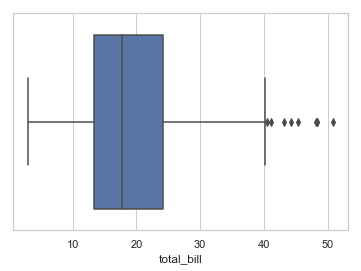

In [2]:
sns.set(style='whitegrid')
tips = sns.load_dataset('tips')
ax = sns.boxplot(x=tips['total_bill'])

#### Obtener los percentiles 75 y 25 (quartiles 1 y 3) 

In [4]:
p75, p25 = np.percentile(tips.total_bill, [75, 25])

**Cálculo del rango intercuartílico**

In [5]:
iqr = p75 - p25

**Cálculo de los límites superior e inferior, datos fuera de estos límites serán datos extremos (outliers)**

In [6]:
min = p25 - (iqr * 1.5)
max = p75 + (iqr * 1.5)

**Valores por encima del rango máximo**

In [9]:
tips.total_bill[tips.total_bill > max]

59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64

**Valores por debajo del rango mínimo**

In [10]:
tips.total_bill[tips.total_bill < min]

Series([], Name: total_bill, dtype: float64)